# [CSCE 508] HW01: Intensity transformation & image filtering

**Points:** 100 points (90 for coding, 10 for the written question)

**Posted:** Tue, Feb 4, 2025

**Due:** 5PM, Tue, Feb 18, 2025

**Submission:** please rename the .ipynb file as __HW01_C00XXXXXX_FirstName_LastName.ipynb__. Then, **zip it together** with your written part and submit the zipped file (rename: __HW01_C00XXXXXX_FirstName_LastName.zip__) to **Moodle**.


# <b> 0. OpenCV </b>
Things are the same for grayscale images. <b>BUT FOR COLOR IMAGES</b>, opencv reads in the BGR order instead of RGB... Need to use `cv2_imshow` to display the image properly. Thus, in this course, we'll primarily use `imageio.imread`. If you choose to use other packages, please ensure they are used correctly.

In [ ]:
import cv2
from imageio import imread, imwrite
import numpy as np
import matplotlib.pyplot as plt

# download image
! wget -O xray_image.png https://raw.githubusercontent.com/hzaoheng123/HZ/main/teaching/sample_images/xray_image.png

! wget -O ULL.png https://raw.githubusercontent.com/hzaoheng123/HZ/main/teaching/sample_images/ULL_1500.png

! wget -O brightfield_bacteria.jpg https://raw.githubusercontent.com/hzaoheng123/HZ/main/teaching/sample_images/brightfield_bacteria.jpg

! wget -O cell_canny_im.png https://raw.githubusercontent.com/hzaoheng123/HZ/main/teaching/sample_images/cell_canny_im.png

! wget -O einstein.png https://raw.githubusercontent.com/hzaoheng123/HZ/main/teaching/sample_images/einstein.png


In [ ]:
I = cv2.imread('ULL.png')
I = cv2.resize(I, (320,320)) # b/c original image is too large
plt.imshow(I)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(I)

# <b>1. Pixel-wise operations (30 pts)</b>


Read and visualize the X-ray image. The image looks washed out as most pixel values are high.

In [ ]:
I_xray = imread('xray_image.png')

plt.figure(figsize=(8, 4))

# show the image
plt.subplot(121)
plt.imshow(I_xray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('input image')

# show the pixel value histogram
plt.subplot(122)
plt.hist(I_xray.reshape(-1), bins=range(0,255,20))
plt.title('pixel value histogram')

plt.show()

## 1.1 Auto-contrast (2 pts)

Scale the image to [0,255] by a simple linear normalization.

In [ ]:
import numpy as np
# Caveat: imshow function automatically scale image
print('Image data type: ', I_xray.dtype)
plt.figure(figsize=(8, 12))

# input image and histogram
plt.subplot(221)
plt.imshow(I_xray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('I')

plt.subplot(222)
plt.hist(I_xray.reshape(-1), bins=range(0,255,20))
plt.title('I histogram')

### Your code starts here ###
I_auto_scale = ???
### Your code ends here ###

plt.subplot(223)
plt.imshow(I_auto_scale, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('auto constrast')

plt.subplot(224)
plt.hist(I_auto_scale.reshape(-1), bins=range(0,255,20))
plt.title('New histogram')


## 1.2 Gamma transformation (3 pts)

Lec.04 Intensity transformation, Page 21.

For the above raw input X-ray image, choose an appropriate parameters (c and $γ$) to improve the image contrast.

In [ ]:
### Your code starts here ###
I_gamma =
### Your code ends here ###


plt.subplot(221)
plt.imshow(I_xray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('I')

plt.subplot(222)
plt.hist(I_xray.reshape(-1), bins=range(0,255,20))
plt.title('I histogram')

plt.subplot(223)
plt.imshow(I_gamma, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Gamma transformation')

plt.subplot(224)
plt.hist(I_gamma.reshape(-1), bins=range(0,255,20))
plt.title('New histogram')

## 1.3 Histogram equalization (10 pts)


<a href="https://en.wikipedia.org/wiki/Histogram_equalization">Wikipedia link</a>

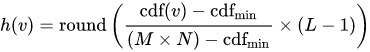

In [ ]:
I_xray = imread('xray_image.png')

### Your code starts here ###
# get statistics

# create the look up table

# output image


### Your code ends here ###


plt.figure(figsize=(10,5))
plt.subplot(221)
plt.imshow(I_xray, cmap='gray')
plt.axis('off')
plt.subplot(222)
plt.imshow(I_xray_eq, cmap='gray')
plt.axis('off')
plt.subplot(223)
plt.hist(I_xray.ravel())
plt.subplot(224)
plt.hist(I_xray_eq.ravel())
plt.show()


**Comparison with OpenCV**

We can directly use the histogram equalization function.
https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

In [ ]:
img = cv2.imread('xray_image.png',0)
equ = cv2.equalizeHist(img)

# from left to right: raw input image, your result, and OpenCV's result
res = np.hstack((img,I_xray_eq,equ)) #stacking images side-by-side

cv2_imshow(res)

## 1.4 Histogram matching (15 pts)

Below is the code for generating the histograms in HW01 Q1.

First, calculate the results manually as part of your written assignment (10 pts).

Then, paste your computed results into the code and plot the transformed histogram (1 pts).

Finally, use OpenCV to perform histogram matching and compare the results with your manual calculations for verification (4 pts).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(intensity_values, frequencies, image_name):
    plt.bar(intensity_values, frequencies, width=8, edgecolor='black', alpha=0.7)
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {image_name}')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

intensity_values_1 = np.array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 255])
frequencies_1 = np.array([5, 10, 20, 35, 50, 70, 90, 110, 120, 100, 80, 60, 40, 20, 10])

intensity_values_2 = np.array([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
frequencies_2 = np.array([10, 20, 50, 90, 100, 60, 30, 40, 50, 90, 120, 110, 30])

# Plot histograms
plot_histogram(intensity_values_1, frequencies_1, "Image 1")
plot_histogram(intensity_values_2, frequencies_2, "Image 2")


### Your code starts here ###
# 1. Paste your results from your written assignment here
intensity_values_1to2 = np.array([???])
frequencies_1to2 = np.array([???])

# 2. Use OpenCV to conduct histogram matching


### Your code ends here ###

plot_histogram(intensity_values_1to2, frequencies_1to2, "Image 1 to 2")
plot_histogram(intensity_values_1to2_OpenCV, frequencies_1to2_OpenCV, "Image 1 to 2 (OpenCV)")


# <b>2. Patch-level operations (70 pts) </b>

## 2.1 Median Filter (5 pts)

Add salt and pepper noise

In [ ]:
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np

# subsample the image by 4x, so that the noise is more visible
I_xray = imread('xray_image.png')[::4,::4]

# add salt and pepper noise
I_xray_noise = I_xray.copy()
I_xray_noise[np.random.random(I_xray.shape)>0.95] = 0
I_xray_noise[np.random.random(I_xray.shape)>0.95] = 255


plt.subplot(121)
plt.imshow(I_xray, cmap='gray', vmin=0, vmax=255);plt.axis('off')
plt.subplot(122)
plt.imshow(I_xray_noise, cmap='gray', vmin=0, vmax=255);plt.axis('off')

Filtering

(not to worry about the border for now; so no need to do anything with the border)

In [ ]:
# patch half size, patch size = 2 * psz_h + 1
psz_h = 1

# make sure to copy, otherwise they reference the same memory (same variable)
I_xray_denoise = I_xray_noise.copy()
im_size = I_xray_denoise.shape

### Your code starts here ###

### Your code ends here ###


plt.subplot(131)
plt.imshow(I_xray, cmap='gray', vmin=0, vmax=255);plt.axis('off');plt.title('clean')
plt.subplot(132)
plt.imshow(I_xray_noise, cmap='gray', vmin=0, vmax=255);plt.axis('off');plt.title('noisy')
plt.subplot(133)
plt.imshow(I_xray_denoise, cmap='gray', vmin=0, vmax=255);plt.axis('off');plt.title('median filter result')

## 2.2 Convolution (10 pts)

We mentioned in class that on the patch-level, the definition of **convolution** is the **dot product** of the **flipped**  kernel. With such definition, the convolution operation is commutatitve. Let's reproduce the first two columns of the illustration below [(Source: Wikipedia)](https://en.wikipedia.org/wiki/Convolution).

<img height=300 src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Comparison_convolution_correlation.svg/512px-Comparison_convolution_correlation.svg.png">

First, let's create the 1D array (curve): `f` and `g`.

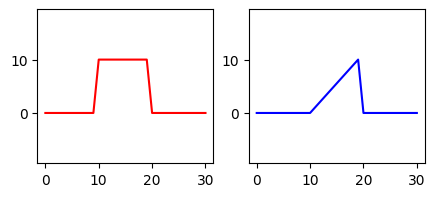

In [56]:
f = np.zeros(31)
f[10:20] = 10
g = np.zeros(31)
g[10:20] = 10*np.linspace(0,1,10)[::1]

plt.rcParams["figure.figsize"] = (5,2)
plt.subplot(1,2,1)
plt.plot(f, 'r')
plt.axis('equal')
plt.subplot(1,2,2)
plt.plot(g, 'b')
plt.axis('equal')
plt.show()

Let's compare the `sliding dot product` and the `convolution` (sliding flipped dot product)

In [ ]:
### Your code starts here ###
# 1. define a function to conduct sliding dot product given two input 1D arrays.
def filter1dSamePadZero(signal, kernel, operation):
  # "same" + "0 padding" the input signal

  # filtering

  return output


# 2. define correlation function by calling above sliding dot product function
def dotproduct1d(ff, gg):

  return result


# 3. define convolution function by calling above sliding dot product function
def conv1d(ff, gg):

  return result
### Your code ends here ###


plt.rcParams["figure.figsize"] = (5,3)
plt.subplot(2,2,1)
plt.plot(filter1dSamePadZero(f, g, conv1d))
plt.title('f conv g')
plt.axis('off')
plt.subplot(2,2,2)
plt.plot(filter1dSamePadZero(g, f, conv1d))
plt.title('g conv f')
plt.axis('off')

plt.subplot(2,2,3)
plt.plot(filter1dSamePadZero(f, g, dotproduct1d))
plt.title('f dotproduct g')
plt.axis('off')

plt.subplot(2,2,4)
plt.plot(filter1dSamePadZero(g, f, dotproduct1d))
plt.title('g dotproduct f')
plt.axis('off')
plt.show()

## 2.3 Sharpening filter (15 pts)


### 2.3.1 [5 pts] Implement the "sharpening filter".  

- step 1: create a convolution kernel matrix (3x3)
- step 2: copy & paste the median filter code for the "filtering"
- step 3: change the patch-level function

BTW, the filter size can be any size. we are using 3x3 for simplicity

In [ ]:
I_xray = imread('xray_image.png')[::4,::4]
# make sure to copy, otherwise they reference the same memory (same variable)
I_xray_sharp = I_xray.copy()


#### your code starts here ####
## step 1. create the kernel matrix

## step 2 & 3. modify the median filter code for filtering


#### your code ends here ####

plt.subplot(121)
plt.imshow(I_xray, cmap='gray');plt.axis('off');plt.title('original')
plt.subplot(122)
plt.imshow(I_xray_sharp, cmap='gray');plt.axis('off');plt.title('sharp')

### 2.3.2 [10 pts] Sharpen filter with paramter $\alpha$

Implement the sharpen filter with OpenCV. i.e., only need to code up the filter kernel and use `cv2.filter2D`. The sharpen kernel in the lecture note sets $\alpha=1$.

Lec. 05 Filtering 1, Page 20

In [ ]:
im_xray = imread('xray_image.png')

kernel_size = 3


### Your code starts here ###
im_xray_sharpen_alpha_1 = ???
im_xray_sharpen_alpha_2 = ???
### Your code ends here ###

plt.figure(figsize=(18, 8))

plt.subplot(221)
plt.imshow(im_xray, cmap='gray')
plt.title('original image')
plt.subplot(222)
plt.imshow(im_xray_sharpen_alpha_1, cmap='gray')
plt.title('alpha=1')
plt.subplot(223)
plt.imshow(im_xray_sharpen_alpha_2, cmap='gray')
plt.title('alpha=2')

## 2.4 Use OpenCV functions

As you now have the hand-on knowledge of convolution, we will directly use OpenCV functions to implement filtering. From now on, you can focus on learning how to use these filters to solve real-world problems.

Syntax:
- Generic filter: `cv2.filter2D(image, -1, kernel matrix)`
- Gaussian: `cv2.GaussianBlur(image, kernel_size, sigma_x, sigma_y)` (if sigma_x=0, it'll be automatically estimated)

[[Tutorial]](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)

In [ ]:

kernel_size = 21
sigma = 5

# Box filter
# note the grid ghosting artifacts
I_box = cv2.filter2D(I, -1, np.ones([kernel_size,kernel_size])/(kernel_size**2))

# Gaussian filter
I_gauss = cv2.GaussianBlur(I, (kernel_size,kernel_size), sigma)

# motion blur filter
# 1D version of box filter, as if the object moves really fast in one direction
I_hblur = cv2.filter2D(I, -1, np.ones([1,kernel_size])/kernel_size)
I_vblur = cv2.filter2D(I, -1, np.ones([kernel_size,1])/kernel_size)


print('box vs. Gaussian filter')
cv2_imshow(np.hstack([I_box,I_gauss]))

print('vertical vs. horizontal motion blur')
cv2_imshow(np.hstack([I_vblur,I_hblur]))

## 2.5 Gaussian Filter (5 pts)

### 2.5.1 Recursive nature

In [ ]:
I = cv2.imread('ULL.png')
I = cv2.resize(I, (320,320)) # b/c original image is too large

kernel_size = 11
sigma = 2
I_gauss_1 = cv2.GaussianBlur(I, (kernel_size,kernel_size), sigma)
I_gauss_2 = cv2.GaussianBlur(I_gauss_1, (kernel_size,kernel_size), sigma)
I_gauss_sqrt2 = cv2.GaussianBlur(I, (kernel_size,kernel_size), sigma * np.sqrt(2))


cv2_imshow(np.hstack([I_gauss_1,I_gauss_2,I_gauss_sqrt2]))

### 2.5.2 Separable nature

In [ ]:
kernel_size = 21
sigma = 110

I_gauss_1 = cv2.GaussianBlur(I, (kernel_size,kernel_size), sigma)

I_gauss_h = cv2.GaussianBlur(I, (kernel_size,1), sigma)
I_gauss_v = cv2.GaussianBlur(I, (1,kernel_size), sigma)

I_gauss_hv = cv2.GaussianBlur(I_gauss_h, (kernel_size,1), sigma)

cv2_imshow(np.hstack([I_gauss_1,I_gauss_h,I_gauss_v,I_gauss_hv]))

### 2.5.3 [5 pts] 2D Gaussian Filter kernel

Let's write a function to generate 2D filter kernel matrix. [[Gaussian function]](https://en.wikipedia.org/wiki/Gaussian_function)

Gaussian kernel. use `np.meshgrid` to generate the matrix of `x` and `y`.

Hints:
- make sure the sum of the kernel is 1
- `kernel_size` is the size of the whole patch


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def getKernel(kernel_size, kernel_type='gaussian', sigma = 1):
  # assume kernel_size is a scalar for both height and width
  if not np.isscalar(kernel_size):
      kernel_size = kernel_size[0]


  #### Your code starts here ####
  if kernel_type == 'gaussian':
    # use the input sigma
    kernel = -1
  else:
    raise NotImplementedError
  #### Your code ends here ####

  return kernel


##### unit test #####
kernel_size = 11

plt.figure(figsize=(8, 8))


# Gaussian kernels
sigmas = [1,5]
for i in range(len(sigmas)):
  sigma = sigmas[i]
  gaussian_kernel = getKernel(kernel_size, 'gaussian', sigma)
  plt.subplot(2,1,i+1)
  plt.imshow(gaussian_kernel, cmap='gray')
  plt.title('Gaussian: sigma=%d' % sigma)
  plt.axis('off')

plt.show()

## 2.6 Edge Filter (5 pts)

In [ ]:
# direct difference filter: [1, -1]
kernel_diff = np.array([1,-1])

# compute the edge on the 0-th channel
Iy = cv2.filter2D(I[:,:,0], -1, kernel_diff)
Ix = cv2.filter2D(I[:,:,0], -1, kernel_diff.reshape([1,2]))
cv2_imshow(np.hstack([Ix,Iy]))


### [5 pts] Canny Edge

Find an online opencv tutorial on how to apply canny edge detection and generate the result.

In [ ]:
im_grace = imread('cell_canny_im.png')

### Your code starts here ###
im_grace_canny =
### Your code ends here ###

plt.figure(figsize=(18, 8))

plt.subplot(121)
plt.imshow(im_grace, cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(im_grace_canny, cmap='gray')
plt.title('canny edge detection results')

## 2.7 Gaussian Derivative Filter

Convolve with Gaussian derivative (GD) filter.

In [ ]:
# load input image
I_cell = imread('cell_canny_im.png')
plt.imshow(I_cell, cmap='gray')
plt.axis('off')
plt.title('input image');

In [ ]:
from imageio import imread
import matplotlib.pyplot as plt
import cv2

I_cell2 = I_cell[::2,::2]
I_cell2 = np.clip(I_cell2.astype(float)  +  20 * np.random.random(I_cell2.shape),0,255)

# direct difference filter: [1, -1]
kernel_diff = np.array([1,-1])
Iy = cv2.filter2D(I_cell2, -1, kernel_diff)
Ix = cv2.filter2D(I_cell2, -1, kernel_diff.reshape([1,2]))

# GD filter
kernel_size = 5
I_guass = cv2.GaussianBlur(I_cell2, [kernel_size,kernel_size], 0)
Iy_GD = cv2.filter2D(I_guass, -1, kernel_diff)
Ix_GD = cv2.filter2D(I_guass, -1, kernel_diff.reshape([1,2]))

# show the image
plt.figure(figsize=(8, 8))
# show the pixel value histogram
plt.subplot(131)
plt.imshow(Iy, cmap='gray')
plt.axis('off')
plt.title('Dy filter')

plt.subplot(132)
plt.imshow(np.abs(Iy) > 10, cmap='gray')
plt.axis('off')
plt.title('Dy filter+threshold: noisy')

plt.subplot(133)
plt.imshow(np.abs(Iy_GD)>10, cmap='gray')
plt.axis('off')
plt.title('GD-y filter+threshold: less noisy')


plt.show()

## 2.8 Adaptive Gaussian Thresholding (15 pts)

Implement the algorithm described in Lec.06 Filtering 2, Case 1 (**not using cv2.adaptiveThreshold function**).

In [ ]:
from imageio import imread,imsave
import matplotlib.pyplot as plt

I_bacteria = imread('brightfield_bacteria.jpg')


### Your code starts here ###

# 1. brightness estimation
# hint: use a big blur kernel
kernel_size = ???
I_bacteria_blur = ???
# 2. recover original image
I_bacteria_out = ???
# 3. auto-contrast into 0-255 image
I_bacteria_out = ???

### Your code ends here ###

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(I_bacteria, cmap='gray')
plt.axis('off')
plt.subplot(222)
plt.imshow(I_bacteria_blur, cmap='gray')
plt.axis('off')
plt.subplot(223)
plt.imshow(I_bacteria_out, cmap='gray')
plt.axis('off')


## 2.9 Match Filter (15 pts)

In [ ]:
I_einstein = cv2.imread('einstein.png',0)
I_eye = I_einstein[85:105,45:65]
plt.subplot(121)
plt.imshow(I_einstein, cmap='gray')
plt.subplot(122)
plt.imshow(I_eye, cmap='gray')
plt.show()

### 2.9.1 [10 pts] Implement normalized cross-correlation (NCC) method.

Lec.06 Filtering 2, Case 2, Method 3.

In [59]:
### Your code starts here ###
result_cc =

result_cc_mean0 =

result_ncc =

### Your code ends here ###

plt.subplot(131)
plt.imshow(result_cc, cmap='gray')
plt.subplot(132)
plt.imshow(result_cc_mean0, cmap='gray')
plt.subplot(133)
plt.imshow(result_ncc, cmap='gray')
plt.show()


### 2.9.2 [5 pts] Use OpenCV functions

Use `cv2.matchTemplate` function to achieve template mathching.

Compare your results with that of OpenCV's.

In [ ]:
### Your code starts here ###
result_cc =

result_cc_mean0 =

result_ncc =
### Your code ends here ###

plt.subplot(131)
plt.imshow(result_cc, cmap='gray')
plt.subplot(132)
plt.imshow(result_cc_mean0, cmap='gray')
plt.subplot(133)
plt.imshow(result_ncc, cmap='gray')
plt.show()
